# ლექცია #4

## კოდების გაშვებისთვის საჭირო ბიბლიოთეკების იმპორტები

ამ ნოუთბუქის გაშვებამდე არ დაგავიწყდეთ საჭირო დამოკიდებულებების (dependencies) დაინსტალირება, რომლებიც მოცემულია `requirements.txt` ფაილში. მარტივად, ტერმინალიდან გაუშვით:

```bash
pip install -r requirements.txt
```

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## რეგრესია

**განსხვავება კლასიფიკაციასა და რეგრესიას შორის**:

არსებობს მცირე, მაგრამ მნიშვნელოვანი განსხვავება იმ პროგნოზებში, რომლებიც უნდა ვაწარმოოთ სხვადასხვა სიტუაციაში. მაშინ როცა, მაგალითად, უახლოესი მეზობლის კლასიფიკატორი ირჩევს კლასის ეტიკეტს ნებისმიერი ელემენტისთვის მოცემული ნაკრებიდან (როგორიცაა spam/ham, ან 0, 1, 2, ..., 9), **წრფივი რეგრესია** პროგნოზირებს რიცხვით მონაცემს, რომელიც არ არის შეზღუდული, რომ იყოს მთელი რიცხვი (integer). ასე რომ, წრფივი რეგრესია უკეთესია იმ სიტუაციებში, როდესაც გამომავალი ცვლადი შეიძლება იყოს ნებისმიერი რიცხვი, როგორიცაა პროდუქტის ფასი, მანძილი დაბრკოლებამდე, Dune-ის შემდეგი ფილმით მიღებული შემოსავალი და ა.შ.

**წრფივი რეგრესიის** ძირითადი იდეა არის თითოეული მახასიათებელი ცვლადის "ეფექტის" შეკრება, რათა წარმოიქმნას პროგნოზირებული მნიშვნელობა. ამ შეკრების პროცესს ეწოდება _წრფივი კომბინაცია_. სიმარტივისთვის განვიხილოთ მაგალითი, მაღაზიაში ნავაჭრი თანხის გამოთვლა.

დავუშვათ, რომ მივდივართ სასურსათო მაღაზიაში და ვყიდულობთ 2.5 კგ კარტოფილს, 1 კგ სტაფილოსა და ორ ბოთლ რძეს. თუ 1 კგ კარტოფილის ფასი არის 2 ლარი, 1 კგ სტაფილოს ფასი 4 ლარი, ხოლო რძის ბოთლი ღირს 3 ლარი, მაშინ მოლარის მიერ გამოთვლილი ანგარიში შეადგენს:

$$2.5 \times 2 ლარი + 1 \times 4 ლარი + 2 \times 3 ლარი = 15 ლარი$$

წრფივი რეგრესიის დროს, კარტოფილის, სტაფილოსა და რძის რაოდენობა არის შემავალი მონაცემები. გამომავალი არის ჩვენი საყიდლების ღირებულება, რომელიც დამოკიდებულია როგორც ფასზე, ასევე თითოეული პროდუქტის რაოდენობაზე, რომელსაც ვყიდულობთ.

სიტყვა წრფივი ნიშნავს, რომ გამომავალი მატება, როდესაც ერთი შემავალი მონაცემი იზრდება გარკვეული ფიქსირებული რაოდენობით, ყოველთვის იგივეა. სხვა სიტყვებით რომ ვთქვათ, როდესაც დავამატებთ, ვთქვათ, ორ კილოგრამ სტაფილოს ჩვენს სავაჭრო კალათაში, გადასახდელი თანხა იზრდება 8 ლარით. როდესაც კიდევ ორ კილოგრამს დავამატებთ, გადასახადი იზრდება კიდევ 8 ლარით, ხოლო თუ დავამატებთ 1 კგ-ს, გადასახადი გაიზრდება 4 ლარით.


**კოეფიციენტები (coefficients) / წონები (weights)**:

ზედა მაგალითის მიხედვით, წრფივ რეგრესიაში, სხვადასხვა პროდუქტის ფასებს ეწოდება კოეფიციენტები ან წონები (ეს შეიძლება დამაბნეველი იყოს, რადგან ჩვენ გავზომეთ კარტოფილისა და სტაფილოს რაოდენობა წონით, მაგრამ ეს სხვა ტერმინია). წრფივი რეგრესიის ერთ-ერთი მთავარი უპირატესობა მისი მარტივი ინტერპრეტაციაა: ნასწავლი წონები შეიძლება რეალურად იყოს უფრო საინტერესო, ვიდრე შედეგების პროგნოზები.

მაგალითად, როდესაც ვიყენებთ წრფივ რეგრესიას სიცოცხლის ხანგრძლივობის პროგნოზირებისთვის, მოწევის წონა (დღეში მოწეული სიგარეტის რაოდენობა) არის დაახლოებით მინუს ნახევარი წელი, რაც იმას ნიშნავს, რომ დღეში ერთით მეტი ღერი სიგარეტის მოწევა საშუალოდ ნახევარი წლით გვაახლოებს დასასრულთან. ანალოგიურად, ბოსტნეულის მოხმარების წონა (ერთი მუჭა ბოსტნეული დღეში) არის პლუს ერთი წელი, ამიტომ ყოველდღიურად ცოტაოდენი ბოსტნეულის ჭამა საშუალოდ კიდევ ერთ წელს მოგვცემს.

**ამოცანა**:

ჩატარდა ვრცელი კვლევა და დადგინდა, რომ კონკრეტულ ქვეყანაში სიცოცხლის ხანგრძლივობა (ადამიანების ცხოვრების წლები საშუალოდ) არამწეველ ქალებში, რომლებიც არ ჭამენ ბოსტნეულს, არის 80 წელი. დავუშვათ, რომ მამაკაცები საშუალოდ 5 წლით ნაკლებს ცხოვრობენ. ასევე გავითვალისწინოთ ზემოთ ნახსენები ინფორმაციაც: ყოველი სიგარეტი დღეში ამცირებს სიცოცხლის ხანგრძლივობას ნახევარი წლით, ხოლო ერთი მუჭა ბოსტნეული დღეში ზრდის მას ერთი წლით.

თქვენი ამოცანაა გამოთვალოთ სიცოცხლის ხანგრძლივობა ცხრილში მოყვანილი ადამიანებისთვის:

| სქესი | სიგარეტი დღეში | ბოსტნეული დღეში | სიცოცხლის ხანგრძლივობა (წლები) |
| ----- | -------------- | --------------- | ------------------------------ |
| კაცი  | 8              | 2               | 73                             |
| კაცი  | 0              | 6               | **A**                          |
| ქალი  | 16             | 1               | **B**                          |
| ქალი  | 0              | 4               | **C**                          |

ცხრილში მოცემული პირველი ადამიანი არის მამაკაცი (გამოვაკლოთ 5 წელი), ეწევა 8 სიგარეტს დღეში (გამოვაკლოთ $8 \times 0.5 = 4$ წელი) და ჭამს დღეში ორ მუჭა ბოსტნეულს (დავამატოთ $2 \times 1 = 2$ წელი). მისი სიცოცხლის სავარაუდო ხანგრძლივობაა $80 - 5 - 4 + 2 = 73$ წელი.

<details>
  <summary>A</summary>
  $80 - 5 - 0 \times 0.5 + 6 \times 1 = 81$
</details>

<details>
  <summary>B</summary>
  $80 - 16 \times 0.5 + 1 \times 1 = 73$
</details>

<details>
  <summary>C</summary>
  $80 - 0 \times 0.5 + 4 \times 1 = 84$
</details>

ზემოთ მოცემულ ამოცანაში, არამწეველი ქალების, რომელთაც არ უყვართ ბოსტნეული, სიცოცხლის ხანგრძლივობა არის 80 წელი. ეს იყო ჩვენი გამოთვლების საწყისი წერტილი. ამ საწყის წერტილს ვუწოდებთ **intercept**-ს.

ზემოთ, ჩვენ განვიხილეთ, თუ როგორ მიიღება პროგნოზები წრფივი რეგრესიიდან, როდესაც ცნობილია როგორც წონა, ასევე შემავალი მახასიათებლები. არც თუ ისე რთული გამოსათვლელია. მაგრამ როდესაც ჩვენ გვაქვს შემავალი და გამომავალი მონაცემები რამდენიმე ელემენტისთვის, ჩვენ შეგვიძლია ვიპოვოთ წონები ისე, რომ პროგნოზირებული გამომავალი მონაცემი მაქსიმალურად ემთხვეოდეს რეალურ გამომავალ მონაცემს. ზუსტად ეს პრობლემა შეგვიძლია გადავჭრათ ML-ით.

მოდი გავაგრძელოთ მაღაზიაში ნავაჭრი თანხის მაგალითი, დავუშვათ, რომ მოგვცეს რამდენიმე საყიდლების კალათის შიგთავსი და თითოეული მათგანის მთლიანი ანგარიში და გვთხოვეს გაგვეგო თითოეული პროდუქტის ფასი (კარტოფილი, სტაფილო და ა.შ.). ერთი კალათიდან, ვთქვათ, 1 კგ სტეიკი, 2 კგ სტაფილო და ერთი ბოთლი საფერავი გვაქვს და ვიცით, რომ მთლიანი გადასახადი ამისთვის 50 ლარია. მიუხედავად ამ ინფორმაციისა ჩვენ ვერ განვსაზღვრავთ ფასებს, რადგან არსებობს ფასების მრავალი კომბინაცია, რომელიც მოგვცემს იგივე მთლიან გადასახადს. თუმცა, ბევრი კალათის მონაცემით, ჩვენ შევძლებთ ამ პრობლემის მოგვარებას უმეტეს შემთხვევაში.

მაგრამ პრობლემას უფრო ართულებს ის ფაქტი, რომ რეალურ სამყაროში ფაქტობრივი გამომავალი მონაცემები ყოველთვის არ არის სრულად განსაზღვრული შემავალი მონაცემებით, სხვადასხვა ფაქტორების გამო, რომლებიც წარმოადგენენ გაურკვევლობას ან "ხმაურს" პროცესში. აი, მაგალითად, საყიდლებზე წავედით ბაზარში, სადაც ნებისმიერი პროდუქტის ფასი შეიძლება დროდადრო განსხვავდებოდეს, ან რესტორანში, სადაც საბოლოო გადასახადში შედის "ჩაიც" (tip). ასეთ სიტუაციებში ჩვენ შეგვიძლია მიახლოებით გამოვთვალოთ ფასები, ანუ მთლად ზუსტი არ იქნება ეს გამოთვლები.

წონების პოვნა, რომლებიც ოპტიმიზაციას უკეთებენ პროგნოზირებულ და რეალურ შედეგების დამთხვევას სატრენინგო მონაცემებში, კლასიკური სტატისტიკური პრობლემაა, რომელიც დათარიღებულია 1800-იანი წლებით და მისი მარტივად გადაჭრა შესაძლებელია მონაცემთა უზარმაზარი ნაკრებისთვისაც კი.

დიდი ხანია ცნობილია, რომ ჭრიჭინები (მწერების სახეობა) უფრო ხშირად ჭრიჭინებენ ცხელ დღეებში, ვიდრე ცივ დღეებში. ათწლეულების განმავლობაში, პროფესიონალი და მოყვარული მეცნიერები აგროვებდნენ მონაცემებს წუთში ჭრიჭინისა და ტემპერატურის შესახებ. დაბადების დღის საჩუქრად, ერთ-ერთმა მეცნიერმა მოგვცა თავისი ჭრიჭინების მონაცემთა ბაზა და გვთხოვა შევქმნათ ML მოდელი ამ ურთიერთობის პროგნოზირებისთვის.

კარგი გზა იმის გასაგებად, თუ რას გვეუბნება წრფივი რეგრესია, არის მისი დიაგრამის დახატვა, რომელიც შეიცავს ჩვენს მონაცემებსა და რეგრესიის შედეგებს.

![Chirps per Minute vs. Temperature in Celsius](https://developers.google.com/static/machine-learning/crash-course/images/CricketPoints.svg)

როგორც მოსალოდნელი იყო, დიაგრამა აჩვენებს ტემპერატურის მატებას ჭრიჭინის რაოდენობის მატებასთან ერთად. წრფივია ეს ურთიერთობა ჭრიჭინსა და ტემპერატურას შორის? დიახ, ჩვენ შეგიძლია დავხაზოთ ერთი სწორი ხაზი ამ ურთიერთობის გამოსახვისთვის:

![Linear relationship](https://developers.google.com/static/machine-learning/crash-course/images/CricketLine.svg)

მართალია, ხაზი არ გადის ყველა წერტილს, მაგრამ ის ნათლად აჩვენებს ჭრიჭინსა და ტემპერატურას შორის ურთიერთობას. ეს ურთიერთობა შეგვიძლია ჩავწეროთ წრფის განტოლების გამოყენებით:

$$y = kx + b$$

სადაც:

* $y$ არის ტემპერატურა ცელსიუსში - მნიშვნელობა, რომლის პროგნოზირებასაც ვცდილობთ.
* $k$ არის ხაზის დახრილობა.
* $x$ არის წუთში ჭრიჭინის რაოდენობა - ჩვენი შემავალი ცვლადის მნიშვნელობა.
* $b$ არის y-თან გადაკვეთის წერტილი (intercept).

ML-ისთვის, ეს ფორმულა ოდნავ სხვანაირად გადაიწერება:

$$y' = b + w_{1}x_{1}$$

სადაც:

* $y'$ არის პროგნოზირებული მნიშვნელობა, რომლის პროგნოზირებასაც ვცდილობთ.
* $b$ არის bias, y-თან გადაკვეთის წერტილი (intercept), ხანდახან $w_0$-საც უწოდებენ.
* $w_1$ არის პირველი შემავალი მონაცემის წონა. ეს წონა იგივე კონცეფციაა, რაც $k$ დახრილობა წრფის ტრადიციულ განტოლებაში.
* $x_1$ არის პირველი შემავალი მონაცემი.

რა თქმა უნდა, ჩვენი მოდელი ძალიან მარტივია, ერთი შემავალი მონაცემი აქვს, თუმცა უფრო კომპლექსურ მოდელებს ბევრი შემავალი მახასიათებელი გააჩნიათ. მაგალითად, თუ გვაქვს $n$ რაოდენობის მახასიათებელი, შესაბამისად ფორმულა იქნება:

$$y' = b + w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n}$$



მოდელის ტრენინგი უბრალოდ ნიშნავს bias-ისა და ყველა წონის კარგი მნიშვნელობების სწავლას (განსაზღვრას) ეტიკეტირებული მაგალითებიდან. Supervised learning-ში, ML ალგორითმი აშენებს მოდელს მრავალი მაგალითის შესწავლით და ცდილობს იპოვნოს მოდელი, რომელიც ამცირებს დანაკარგს (**loss**). ამ პროცესს ემპირიული რისკის მინიმიზაცია ეწოდება.

დანაკარგი არის ჯარიმა ცუდი პროგნოზისთვის. ანუ, დანაკარგი არის რიცხვი, რომელიც მიუთითებს იმაზე, თუ რამდენად ცუდი იყო მოდელის პროგნოზი ერთ მაგალითზე. თუ მოდელის პროგნოზი სრულყოფილია, დანაკარგი ნულის ტოლია. წინააღმდეგ შემთხვევაში, დანაკარგი უფრო დიდია. მოდელის ტრენინგის მიზანია ვიპოვოთ წონებისა და bias-ების ნაკრები, რომელსაც აქვს მცირე დანაკარგი საშუალოდ ყველა მაგალითში. მაგალითად, მოცემული სურათი გვიჩვენებს მაღალი დანაკარგის მოდელს მარცხნივ და დაბალი დანაკარგის მოდელს მარჯვნივ:

* ისრები წარმოადგენს დანაკარგს.
* ლურჯი ხაზები წარმოადგენს პროგნოზებს.

![High loss in the left model; low loss in the right model](https://developers.google.com/machine-learning/crash-course/images/LossSideBySide.png)

ყურადღება მიაქციეთ, რომ მარცხენა დიაგრამაზე ისრები გაცილებით გრძელია ვიდრე ისრები მარჯვენა დიაგრამაზე. ცხადია, მარჯვენა დიაგრამის ხაზი ბევრად უკეთესი პროგნოზირებადი მოდელია, ვიდრე მარცხენა დიაგრამის ხაზი.

ძალიან ხშირად წრფივი რეგრესიისთვის იყენებენ **კვადრატული დანაკარგის** (**squared loss**) (ასევე ცნობილია როგორც **$L_2$ loss**) **დანაკარგის ფუნქციას** (**loss function**). კვადრატული დანაკარგი არის ეტიკეტსა და პროგნოზს შორის სხვაობის კვადრატი და ერთი მაგალითისთვის განისაზღვრება ასე:

$$(observation - prediction(x))^2 = (y - y')^2$$

**საშუალო კვადრატული დანაკარგი** (**Mean squared error** - **MSE**) არის საშუალო კვადრატული დანაკარგი თითო მაგალითზე მთელ მონაცემთა ბაზაში. MSE-ის გამოსათვლელად უნდა შევკრიბოთ ყველა კვადრატული დანაკარგი ცალკეული მაგალითებისთვის და შემდეგ გავყოთ მაგალითების რაოდენობაზე:

$$MSE = \frac{1}{N} \sum_{(x,y)\in D} (y - prediction(x))^2$$

სადაც:

* $(x, y)$ არის მაგალითი, რომელშიც
    - $x$ არის მახასიათებლები (მაგალითად, ჭრიჭინი/წუთი, ასაკი, სქესი), რომელსაც მოდელი იყენებს პროგნოზირებისთვის.
    - $y$ არის მაგალითის ეტიკეტი (მაგალითად, ტემპერატურა).
* $prediction(x)$ არის ფუნქცია წონებისა და bias-ის $x$ მახასიათებლებთან ერთად.
* $D$ არის მონაცემთა ნაკრები, რომელიც შეიცავს ბევრ ეტიკეტირებულ მაგალითს, $(x, y)$ წყვილებს.
* $N$ არის მაგალითების რაოდენობა $D$-ში.

მიუხედავად იმისა, რომ MSE ხშირად გამოიყენება ML-ში, ის არც ერთადერთი პრაქტიკული და არც საუკეთესო დანაკარგის ფუნქცია ყველა გარემოებისთვის.

[სტატია: 14 დანაკარგის ფუნქცია, რომელიც შეგიძლიათ გამოიყენოთ რეგრესიისთვის](https://medium.com/@mlblogging.k/14-loss-functions-you-can-use-for-regression-b24db8dff987)

### დანაკარგის შემცირება

#### განმეორებადი მიდგომა

![An iterative approach to training a model](https://developers.google.com/static/machine-learning/crash-course/images/GradientDescentDiagram.svg)

განმეორებადი სტრატეგიები საკმაოდ პოპულარულია ML-ში იმიტომ, რომ ისინი კარგად მასშტაბირებენ მონაცემთა დიდ ნაკრებებზე.

მოცემულ სურათზე, "model" იღებს ერთ ან მეტ მახასიათებელს და აბრუნებს ერთ პროგნოზს. სიმარტივისთვის ვთქვათ, რომ მოდელი იღებს 1 მახასიათებელს $x_1$ და აბრუნებს ერთ პროგნოზს $y'$:

$$y' = b + w_1x_1$$

წრფივი რეგრესიისთვის $b$-სა და $w_1$-ისთვის საწყის მნიშვნელობებად რას ავიღებთ არ არის მნიშვნელოვანი. ჩვენ შეგვიძლია ავირჩიოთ შემთხვევითი მნიშვნელობები, მაგრამ მოდი ავირჩიოთ ტრივიალური მნიშვნელობები:

$$b = 0$$ 

$$w_1 = 0$$

დავუშვათ, რომ პირველი მახასიათებლის მნიშვნელობა არის 10. ამ მახასიათებლის მნიშვნელობის პროგნოზირების ფუნქციისთვის გადაცემა მოგვცემს შემდეგ გამოსახულებას:

$$y' = 0 + 0 \cdot 10 = 0$$

"Compute Loss" ნაწილი არის დანაკარგის ფუნქცია, რომელსაც მოდელი იყენებს, მაგალითად, squared loss, რომელსაც მოსდევს "Compute parameter updates" ნაწილი, სადაც ML სისტემა იკვლევს დანაკარგის ფუნქციის შედეგს და ანახლებს $b$ და $w_1$ მნიშვნელობებს. სწავლის პროცესი გრძელდება მანამ, სანამ ალგორითმი არ აღმოაჩენს მოდელის პარამეტრებს ყველაზე დაბალი შესაძლო დანაკარგით. ჩვეულებრივ, ამ პროცესს ვიმეორებთ მანამ, სანამ მთლიანი დანაკარგი შეწყვეტს ცვლილებას ან როცა ძალიან ნელა იცვლება. როდესაც ეს მოხდება, ჩვენ ვამბობთ, რომ "model has **converged**".

#### Gradient Descent

განმეორებითი მიდგომის დიაგრამა შეიცავდა მწვანე ყუთს სათაურით "Compute parameter updates", რომელიც საკმაოდ მნიშვნელოვანია.

თუ ყველა შესაძლო $w_1$-ისთვის გამოვთვლით დანაკარგს რეგრესიაში და მათ გამოვსახავთ დიაგრამაზე, მივიღებთ პარაბოლას, რომლის შტოებიც მაღლაა:

![Regression problems yield convex loss vs. weight plots](https://developers.google.com/static/machine-learning/crash-course/images/convex.svg)

ამ პარაბოლას, მხოლოდ ერთი მინიმუმის წერტილი გააჩნია, სადაც დახრილობა 0-ის ტოლია. ეს მინიმუმის წერტილია, რომლისკენაც დანაკარგის ფუნქცია ისწრაფვის.

ყველა შესაძლო $w_1$-ისთვის დანაკარგის ფუნქციის გამოთვლა ყველა მონაცემისთვის არის არაეფექტური გზა კონვერგენციის წერტილის მოსაძებნად. ამიტომაც განვიხილავთ უკეთეს მექანიზმს, რომელიც ძალიან პოპულარულია ML-ში, **gradient descent**-ს.

პირველი ეტაპი არის საწყისი წერტილის არჩევა. რას ავირჩევთ დიდად არ აქვს მნიშვნელობა, ამიტომაც უმეტესი ალგორითმები $w_1$-ისთვის იღებენ ან 0 ან შემთხვევით მნიშვნელობას. როგორც სურათზე ჩანს, ამ შემთხვევაში, ჩვენ ავირჩიეთ საწყისი წერტილი, რომელიც 0-ზე ოდნავ მეტია:

![A starting point for gradient descent](https://developers.google.com/static/machine-learning/crash-course/images/GradientDescentStartingPoint.svg)

Gradient descent-ის ალგორითმი ითვლის დანაკარგის მრუდის გრადიენტს ამ საწყის წერტილში. დანაკარგის გრადიენტი მრუდის წარმოებულის ტოლია. როდესაც არსებობს მრავალი წონა, გრადიენტი არის ნაწილობრივი წარმოებულების ვექტორი წონებთან მიმართებაში.

გრადიენტი არის ვექტორი, ამიტომაც მას გააჩნია მიმართულება და სიგრძე. გრადიენტი ყოველთვის მიუთითებს დანაკარგის ფუნქციის ყველაზე ციცაბო ზრდის მიმართულებით. Gradient descent-ის ალგორითმი დგამს ნაბიჯს უარყოფითი გრადიენტის მიმართულებით, რათა რაც შეიძლება სწრაფად შეამციროს დანაკარგი.

![Gradient descent relies on negative gradients](https://developers.google.com/static/machine-learning/crash-course/images/GradientDescentNegativeGradient.svg)

დაკარგის ფუნქციის მრუდის გასწვრივ შემდეგი წერტილის დასადგენად, gradient descent-ის ალგორითმი ამატებს გრადიენტის სიდიდის გარკვეულ ნაწილს საწყის წერტილს, როგორც ეს ნაჩვენებია შემდეგ სურათზე:

![A gradient step moves us to the next point on the loss curve](https://developers.google.com/static/machine-learning/crash-course/images/GradientDescentGradientStep.svg)

Gradient descent შემდეგ იმეორებს ამ პროცესს და მინიმალურთან სულ უფრო ახლოს მიდის.

როდესაც gradient descent-ს ვიყენებთ, ამ პროცესს ვანზოგადებთ, რომ დავარეგულიროთ ყველა პარამეტრი ერთდროულად. მაგალითად, თუ ვეძებთ ოპტიმალურ მნიშვნელობებს $w_1$-ისთვის და $b$-ისთვის, ვითვლით გრადიენტს ორივეს მიმართებით. შემდგომ ვცვლით მათ მნიშვნელობას მათ გრადიენტებზე დაყრდნობით და ასე ვიმეორებთ ამ ნაბიჯებს, სანამ არ მივაღწევთ მინიმალურ დანაკარგს.

#### Learning Rate

როგორც ზემოთ ვახსენეთ, გრადიენტის ვექტორს გააჩნია სიგრძე და მიმართულება. Gradient descent-ის ალგორითმები ამრავლებენ გრადიენტის ვექტორს სკალარზე, რომელსაც ვუწოდებთ learning rate-ს (ხანდახან მოიხსენიება ხოლმე, როგორც ნაბიჯის ზომა - step size), რომ იპოვონ შემდეგი წერტილი. მაგალითად, თუ გრადიენტის სიგრძე არის 2.5 და სწავლის სიჩქარე 0.01, მაშინ gradient descent-ის ალგორითმი აირჩევს შემდეგ წერტილს 0.025 დაშორებით წინა წერტილიდან.

Learning rate მიეკუთვნება ჰიპერ-პარამეტრს და ზოგადად, ML-ში ჰიპერ-პარამეტრების ოპტიმიზაცია ძალიან მნიშვნელოვანია. მაგალითად, თუ ავირჩევთ learning rate-ს, რომელიც ძალიან მცირეა, სწავლას ძალიან დიდი დრო დასჭირდება:

![Learning rate is too small](https://developers.google.com/static/machine-learning/crash-course/images/LearningRateTooSmall.svg)

თუ ძალიან დიდ learning rate-ს ავირჩევთ, შედეგად მინიმუმს გადავცდებით:

![Learning rate is too large](https://developers.google.com/static/machine-learning/crash-course/images/LearningRateTooLarge.svg)

არსებობს Goldilocks learning rate რეგრესიის ყველა პრობლემისთვის. Goldilocks-ის მნიშვნელობა დაკავშირებულია იმასთან, თუ რამდენად "ბრტყელია" დანაკარგის ფუნქცია (დანაკარგის ფუნქცია ნაკლებად მგრძნობიარეა ამ რეგიონში მოდელის პარამეტრების ცვლილებების მიმართ). თუ ვიცით, რომ დაკარგის ფუნქციის გრადიენტი მცირეა, მაშინ შეგვიძლია ვცადოთ უფრო დიდი learning rate, რომელიც აანაზღაურებს მცირე გრადიენტს და გამოიწვევს უფრო დიდ ნაბიჯს.

![Learning rate is just right](https://developers.google.com/static/machine-learning/crash-course/images/LearningRateJustRight.svg)

## წრფივი რეგრესია scikit-learn-ის გამოყენებით

გამოვიყენოთ პატარა მონაცემთა ნაკრები, სადაც მოცემულია კონკრეტული ნივთის რეკლამის დანახარჯები ტელევიზორში, რადიოსა და გაზეთში (ათასობით
დოლარში) და ამ ნივთის გაყიდვების (ათასობით ერთეულში) მონაცემები.

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/erkansirin78/datasets/master/Advertising.csv",
    index_col="ID",
)
df.head()

,TV,Radio,Newspaper,Sales
ID,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


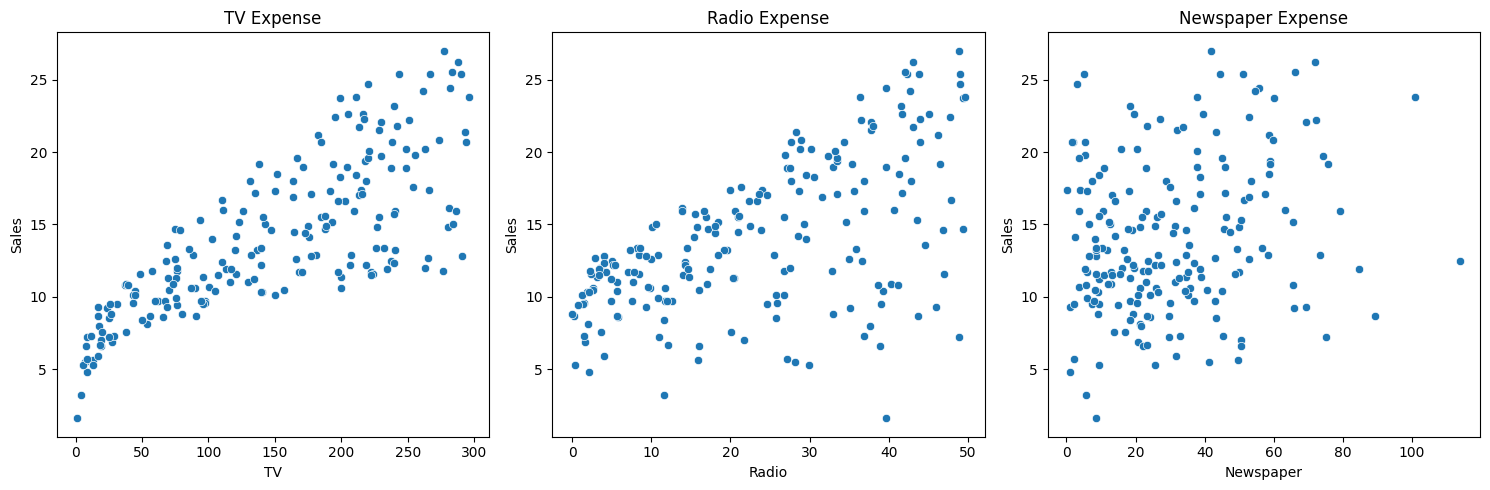

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.scatterplot(df, x="TV", y="Sales", ax=axes[0])
axes[0].set_title("TV Expense")

sns.scatterplot(df, x="Radio", y="Sales", ax=axes[1])
axes[1].set_title("Radio Expense")

sns.scatterplot(df, x="Newspaper", y="Sales", ax=axes[2])
axes[2].set_title("Newspaper Expense")

plt.tight_layout()

მოდი, ვეცადოთ ვუპასუხოთ კითხვას, არის თუ არა წრფივი კავშირი ჯამურ სარეკლამო დანახარჯებსა და გაყიდვებს შორის. ამისთვის შევქმნათ ახალი სვეტი `total`, სადაც მოვათავსებთ ჯამურ სარეკლამო ღირებულებას.

In [4]:
df["total"] = df["TV"] + df["Radio"] + df["Newspaper"]
df.head()

,TV,Radio,Newspaper,Sales,total
ID,,,,,
1,230.1,37.8,69.2,22.1,337.1
2,44.5,39.3,45.1,10.4,128.9
3,17.2,45.9,69.3,9.3,132.4
4,151.5,41.3,58.5,18.5,251.3
5,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total', ylabel='Sales'>

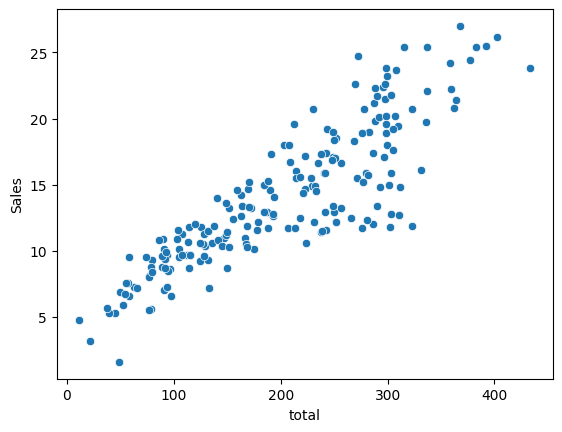

In [5]:
sns.scatterplot(df, x="total", y="Sales")

<Axes: xlabel='total', ylabel='Sales'>

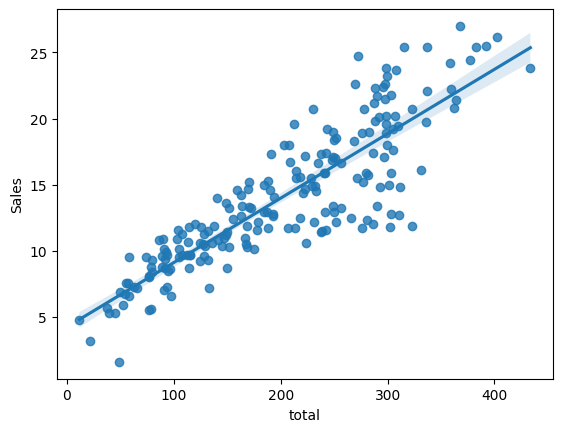

In [6]:
sns.regplot(df, x="total", y="Sales")

იმისთვის, რომ მარტივი წრფივი რეგრესიის მოდელი დავატრენინგოთ, შევქმნათ სატრენინგო და სატესტო ნაკრებები:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df[["TV", "Radio", "Newspaper"]], df["Sales"], test_size=0.1, random_state=1
)

დავატრენინგოთ წრფივი რეგრესიის მოდელი:

In [8]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [9]:
print("მოდელის მიერ ნასწავლი კოეფიციენტები/წონები:", reg.coef_)
print("მოდელის მიერ ნასწავლი bias/intercept:", reg.intercept_)

მოდელის მიერ ნასწავლი კოეფიციენტები/წონები: [ 0.04647758  0.18534601 -0.00231602]
მოდელის მიერ ნასწავლი bias/intercept: 2.9566617718347725


ვნახოთ MSE სატრენინგო და სატესტო მონაცემებზე:

In [10]:
mean_squared_error(y_train, reg.predict(X_train))

2.823383445726992

In [11]:
mean_squared_error(y_test, reg.predict(X_test))

2.5031335080097588

უფრო კარგად რომ დავინახოთ შედეგები, DataFrame შევქმნათ სატესტო მონაცემებისგან და პროგნოზებისგან:

In [12]:
df_test = pd.DataFrame(X_test, columns=["TV", "Radio", "Newspaper"])
df_test["label"] = y_test
df_test["predicted"] = reg.predict(X_test)
df_test

,TV,Radio,Newspaper,label,predicted
ID,,,,,
59,210.8,49.6,37.7,23.8,21.859984
41,202.5,22.3,31.6,16.6,16.428401
35,95.7,1.4,7.4,9.5,7.646912
103,280.2,10.1,21.4,14.8,17.802111
185,253.8,21.3,30.0,17.6,18.631061
199,283.6,42.0,66.2,25.5,23.768915
96,163.3,31.6,52.9,16.9,16.280867
5,180.8,10.8,58.4,12.9,13.226289
30,70.6,16.0,40.8,10.5,9.109021


რა თქმა უნდა, მიღებული შედეგი არ არის კარგი, თუმცა ეს ისედაც მოსალოდნელი იყო მონაცემების რაოდენობიდან გამომდინარე.